In [1]:
import numpy as np
import networkx as nx
from wl_utils import weisfeiler_lehman

# Brute force 
Brute forcing through all connected graphs of size $9$ to find counter examples to the statement that the same pagerank implies the same WL classes.
(Takes about 6 mins on the server)

In [2]:
Graphs = nx.readwrite.read_graph6("../datasets/graph9c.g6")
pagerank_dict = {}

In [3]:
for g in Graphs:
    pr = tuple(sorted(list(nx.pagerank(g).values())))
    wl = tuple(sorted(weisfeiler_lehman(g)[0]))
    if pr not in pagerank_dict:
        pagerank_dict[pr] = set([(wl,g)])
    else :
        pagerank_dict[pr].add((wl, g))

In [4]:
g_1 =list([(pr, pagerank_dict[pr]) for pr in pagerank_dict.keys() if len(pagerank_dict[pr]) > 1 and list(pagerank_dict[pr])[0][0] != list(pagerank_dict[pr])[1][0]][0][1])[0][1]
g_2 =list([(pr, pagerank_dict[pr]) for pr in pagerank_dict.keys() if len(pagerank_dict[pr]) > 1 and list(pagerank_dict[pr])[0][0] != list(pagerank_dict[pr])[1][0]][0][1])[1][1]

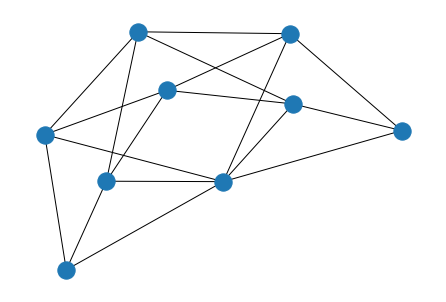

In [5]:
nx.draw_spring(g_1)

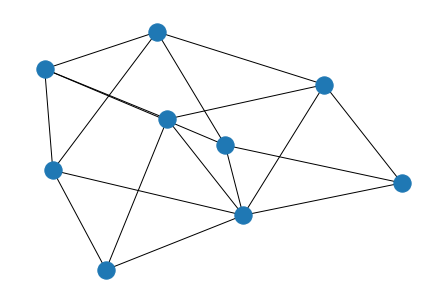

In [6]:
nx.draw_spring(g_2)

In [7]:
[(pr, pagerank_dict[pr]) for pr in pagerank_dict.keys() if len(pagerank_dict[pr]) > 1 and list(pagerank_dict[pr])[0][0] != list(pagerank_dict[pr])[1][0]]

[((0.08657979791469048,
   0.08657979791469048,
   0.1111111111111111,
   0.1111111111111111,
   0.1111111111111111,
   0.1111111111111111,
   0.1111111111111111,
   0.1111111111111111,
   0.1601737375039523),
  {((2212, 2212, 27144, 27144, 27144, 27144, 88932, 88932, 137739),
    <networkx.classes.graph.Graph at 0x7fb42ac0cbb0>),
   ((259354, 259354, 745177, 745177, 757202, 757202, 757204, 958013, 958013),
    <networkx.classes.graph.Graph at 0x7fb3e22fdf70>),
   ((1409426,
     1409426,
     1409427,
     1409427,
     1409428,
     1409429,
     1409430,
     1409430,
     1409431),
    <networkx.classes.graph.Graph at 0x7fb3f4b08e20>)})]

In [8]:
nx.pagerank(g_1), nx.pagerank(g_2)

({0: 0.1111111111111111,
  1: 0.1111111111111111,
  2: 0.1111111111111111,
  3: 0.1111111111111111,
  4: 0.08657979791469048,
  5: 0.08657979791469048,
  6: 0.1111111111111111,
  7: 0.1111111111111111,
  8: 0.1601737375039523},
 {0: 0.08657979791469048,
  1: 0.1111111111111111,
  2: 0.08657979791469048,
  3: 0.1111111111111111,
  4: 0.1111111111111111,
  5: 0.1111111111111111,
  6: 0.1111111111111111,
  7: 0.1111111111111111,
  8: 0.1601737375039523})

In [9]:
weisfeiler_lehman(g_1), weisfeiler_lehman(g_2)
# The chaos output here is to be read as: wl outputs a 4-tuple: (final coloring, number of iterations needed, set of colors per iteration, color assignements per iteration)

((array([ 27144,  27144,  27144,  27144,   2212,   2212,  88932,  88932,
         137739]),
  2,
  [{1}, {18, 19, 54}, {2212, 27144, 88932, 137739}],
  [array([1, 1, 1, 1, 1, 1, 1, 1, 1]),
   array([54, 54, 54, 54, 18, 18, 54, 54, 19]),
   array([ 27144,  27144,  27144,  27144,   2212,   2212,  88932,  88932,
          137739])]),
 (array([259354, 745177, 259354, 958013, 757202, 757202, 958013, 745177,
         757204]),
  3,
  [{1},
   {18, 19, 54},
   {2212, 27144, 88932, 137739},
   {259354, 745177, 757202, 757204, 958013}],
  [array([1, 1, 1, 1, 1, 1, 1, 1, 1]),
   array([18, 54, 18, 54, 54, 54, 54, 54, 19]),
   array([  2212,  88932,   2212,  27144,  27144,  27144,  27144,  88932,
          137739]),
   array([259354, 745177, 259354, 958013, 757202, 757202, 958013, 745177,
          757204])]))

# Counter example to Krylov space?
Taking the example from above, do they span the same Krylov subspace starting from all-ones?

In [10]:
A_1 = nx.to_numpy_array(g_1)
A_2 = nx.to_numpy_array(g_2)

In [11]:
for i in range(10):
    print(sorted(np.linalg.matrix_power(A_1,i) @ np.ones(9)))
    print(sorted(np.linalg.matrix_power(A_2,i) @ np.ones(9)))


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0]
[3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0]
[14.0, 14.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 22.0]
[14.0, 14.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 22.0]
[56.0, 56.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 96.0]
[56.0, 56.0, 67.0, 67.0, 68.0, 68.0, 69.0, 69.0, 96.0]
[232.0, 232.0, 272.0, 272.0, 288.0, 288.0, 288.0, 288.0, 384.0]
[233.0, 233.0, 272.0, 272.0, 286.0, 286.0, 288.0, 288.0, 386.0]
[960.0, 960.0, 1152.0, 1152.0, 1160.0, 1160.0, 1160.0, 1160.0, 1616.0]
[960.0, 960.0, 1132.0, 1132.0, 1163.0, 1163.0, 1179.0, 1179.0, 1614.0]
[3936.0, 3936.0, 4640.0, 4640.0, 4880.0, 4880.0, 4880.0, 4880.0, 6560.0]
[3956.0, 3956.0, 4637.0, 4637.0, 4838.0, 4838.0, 4885.0, 4885.0, 6604.0]
[16320.0, 16320.0, 19520.0, 19520.0, 19776.0, 19776.0, 19776.0, 19776.0, 27392.0]
[16327.0, 16327.0, 19198.0, 19198.0, 19834.0, 19834.0, 20082.0, 20082.0, 27358.0]
[66944.0, 66944.

## So this example is not a counterexample
I tried to see if any of the graphs were, but it seems they are not..

In [13]:
snp_dict = {}
for g in Graphs:
    wl = tuple(sorted(weisfeiler_lehman(g)[0]))
    A = nx.to_numpy_array(g)
    SNP = []
    for i in range(10):
        SNP.append(sorted(np.linalg.matrix_power(A,i) @ np.ones(9)))
    SNP = np.array(SNP).astype(int)
    snp_reverse = [SNP[len(SNP)-(i+1)] for i in range(len(SNP))]
    SNP_tuple = tuple(SNP[:,np.lexsort(snp_reverse)].flatten())
    
    
    if SNP_tuple not in snp_dict:
        snp_dict[SNP_tuple] = set([(wl, g)])
    else :
        snp_dict[SNP_tuple].add((wl, g))



In [14]:
list([(pr, snp_dict[pr]) for pr in snp_dict.keys() if len(snp_dict[pr]) > 1 and list(snp_dict[pr])[0][0] != list(snp_dict[pr])[1][0]])

[]